In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

dates = pd.date_range(start="2022-01-01", end="2024-12-31", freq="D")

data = {
    "Date": dates,
    "Units_Sold": np.random.randint(20, 200, len(dates)),
}

df = pd.DataFrame(data)
df["Revenue"] = df["Units_Sold"] * np.random.randint(500, 1500)

df.to_csv("sales_data.csv", index=False)
df.head()


,Date,Units_Sold,Revenue
0,2022-01-01,122,69296
1,2022-01-02,199,113032
2,2022-01-03,112,63616
3,2022-01-04,34,19312
4,2022-01-05,126,71568


In [2]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2022-01-01 to 2024-12-31
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Units_Sold  1096 non-null   int64
 1   Revenue     1096 non-null   int64
dtypes: int64(2)
memory usage: 25.7 KB


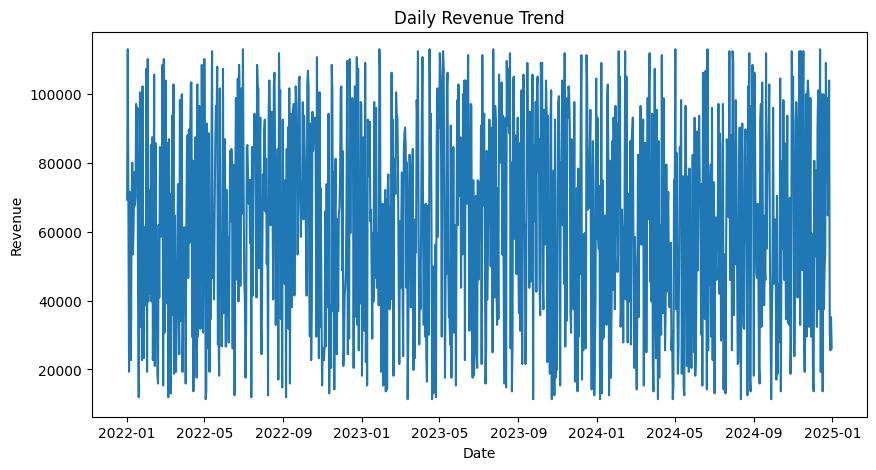

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["Revenue"])
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


/tmp/ipython-input-575137593.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample("M").sum()


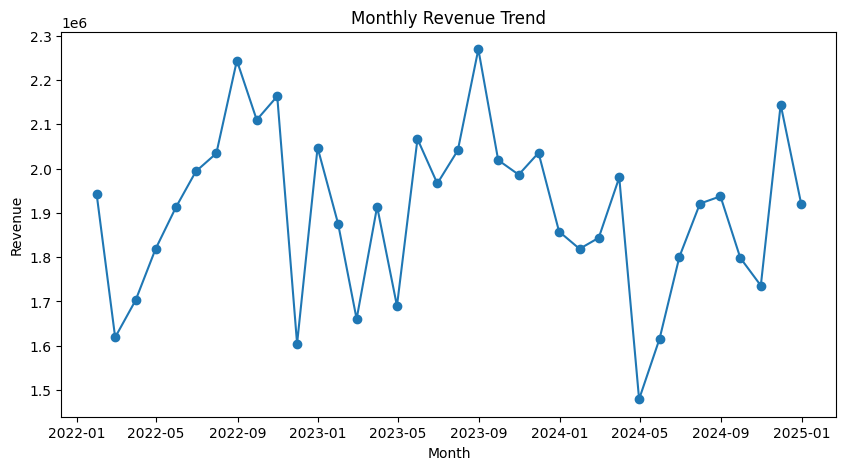

In [4]:
monthly_sales = df.resample("M").sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales["Revenue"], marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


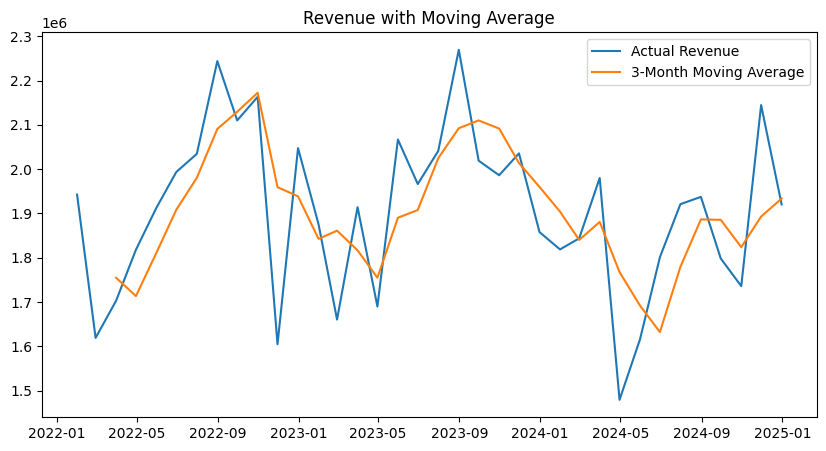

In [5]:
monthly_sales["MA_3"] = monthly_sales["Revenue"].rolling(window=3).mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales["Revenue"], label="Actual Revenue")
plt.plot(monthly_sales["MA_3"], label="3-Month Moving Average")
plt.legend()
plt.title("Revenue with Moving Average")
plt.show()


In [6]:
monthly_sales["Growth_Rate_%"] = monthly_sales["Revenue"].pct_change() * 100
monthly_sales.head()


,Units_Sold,Revenue,MA_3,Growth_Rate_%
Date,,,,
2022-01-31,3420,1942560,NaN,NaN
2022-02-28,2850,1618800,NaN,-16.666667
2022-03-31,2998,1702864,1.754741e+06,5.192982
2022-04-30,3201,1818168,1.713277e+06,6.771181
2022-05-31,3368,1913024,1.811352e+06,5.217120


In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

monthly_sales = monthly_sales.reset_index()
monthly_sales["Month_Index"] = np.arange(len(monthly_sales))

X = monthly_sales[["Month_Index"]]
y = monthly_sales["Revenue"]

model = LinearRegression()
model.fit(X, y)

future_months = 6
future_index = np.arange(len(monthly_sales), len(monthly_sales)+future_months).reshape(-1,1)

forecast = model.predict(future_index)
forecast


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1878223.63174603, 1876786.01424281, 1875348.3967396 ,
       1873910.77923638, 1872473.16173316, 1871035.54422994])

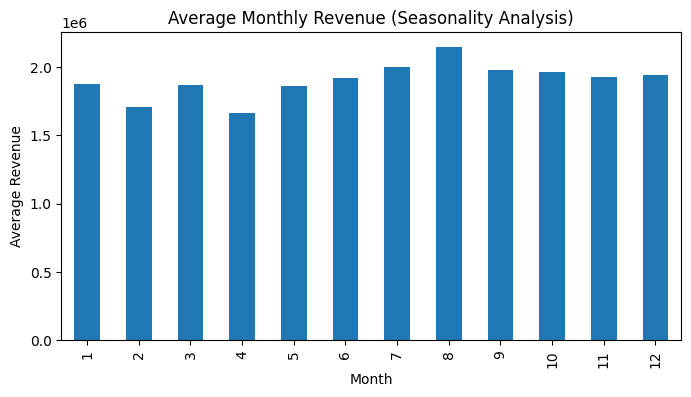

In [8]:
monthly_sales["Month"] = monthly_sales["Date"].dt.month

seasonality = monthly_sales.groupby("Month")["Revenue"].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
seasonality.plot(kind="bar")
plt.title("Average Monthly Revenue (Seasonality Analysis)")
plt.xlabel("Month")
plt.ylabel("Average Revenue")
plt.show()


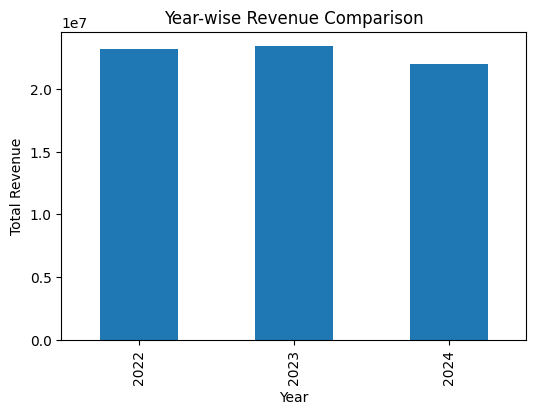

In [9]:
monthly_sales["Year"] = monthly_sales["Date"].dt.year

yearly_sales = monthly_sales.groupby("Year")["Revenue"].sum()

plt.figure(figsize=(6,4))
yearly_sales.plot(kind="bar")
plt.title("Year-wise Revenue Comparison")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.show()


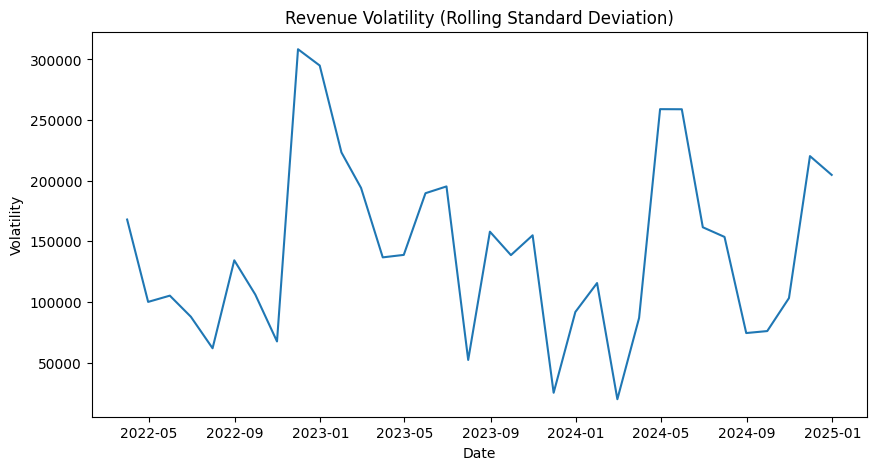

In [10]:
monthly_sales["Rolling_STD"] = monthly_sales["Revenue"].rolling(3).std()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales["Date"], monthly_sales["Rolling_STD"])
plt.title("Revenue Volatility (Rolling Standard Deviation)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()


/tmp/ipython-input-3775667310.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


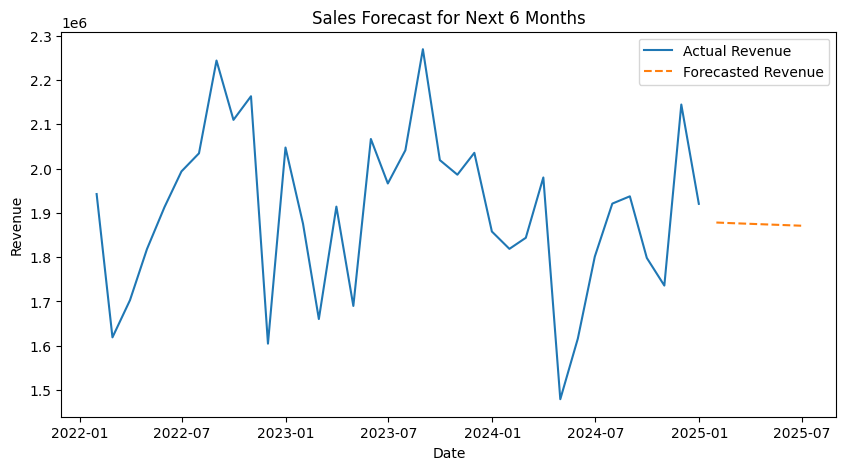

In [11]:
future_dates = pd.date_range(
    start=monthly_sales["Date"].iloc[-1] + pd.DateOffset(months=1),
    periods=6,
    freq="M"
)

plt.figure(figsize=(10,5))
plt.plot(monthly_sales["Date"], monthly_sales["Revenue"], label="Actual Revenue")
plt.plot(future_dates, forecast, label="Forecasted Revenue", linestyle="--")
plt.legend()
plt.title("Sales Forecast for Next 6 Months")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


In [12]:
total_revenue = monthly_sales["Revenue"].sum()
avg_monthly_growth = monthly_sales["Growth_Rate_%"].mean()

print("Total Revenue:", round(total_revenue,2))
print("Average Monthly Growth (%):", round(avg_monthly_growth,2))


Total Revenue: 68573504
Average Monthly Growth (%): 0.7
